# **INITIALIZATION AND MODULE DOWNLOAD**

In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
!pip install fastbook

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:

import fastbook
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import pandas as pd
from fastai import metrics
import numpy as np

# Dataset Path

In [18]:
path = Path("/kaggle/input/apparel-images-dataset")
path.ls()

(#24) [Path('/kaggle/input/apparel-images-dataset/white_pants'),Path('/kaggle/input/apparel-images-dataset/black_pants'),Path('/kaggle/input/apparel-images-dataset/white_shoes'),Path('/kaggle/input/apparel-images-dataset/brown_shoes'),Path('/kaggle/input/apparel-images-dataset/blue_shirt'),Path('/kaggle/input/apparel-images-dataset/green_shoes'),Path('/kaggle/input/apparel-images-dataset/blue_pants'),Path('/kaggle/input/apparel-images-dataset/white_shorts'),Path('/kaggle/input/apparel-images-dataset/red_pants'),Path('/kaggle/input/apparel-images-dataset/blue_shoes')...]

# Load Images


## DataLoader for Apparel Class
* ITEM TRANSFORM: Resize to 224 pixel with bicubic resampling

In [19]:
def label_func(x): return x.parents[0].stem.split("_")[1]
dls = ImageDataLoaders.from_path_func(path, get_image_files(path), label_func,item_tfms=Resize(224,resamples=(3, 0)) )

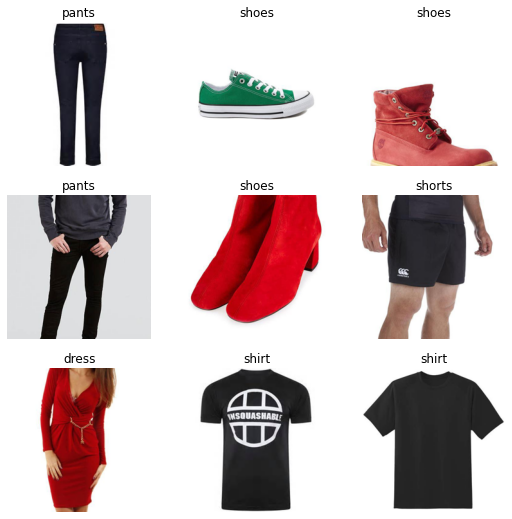

In [20]:
dls.show_batch()

## DataLoader for Apparel Colour
* ITEM TRANSFORM: Resize to 224 pixel with bicubic resampling

In [21]:
def label_func1(x): return x.parents[0].stem.split("_")[0]
dlsc = ImageDataLoaders.from_path_func(path, get_image_files(path), label_func1,item_tfms=Resize(224,resamples=(3, 0)) )

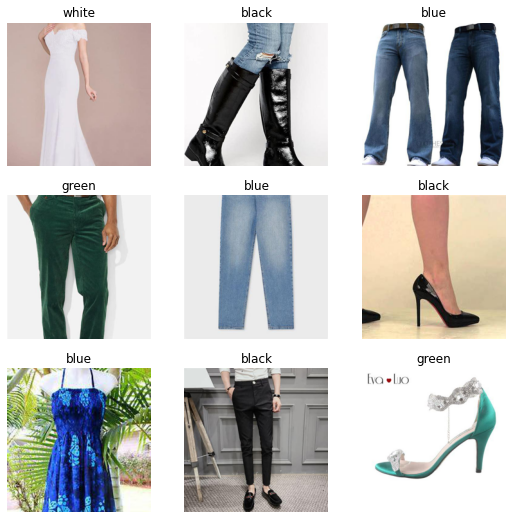

In [22]:
dlsc.show_batch()

# Training

## Training for Apparel Class
* MODEL : ResNet-34
* Loss Function : Flattened Cross Entropy Loss
* Optimizer : ADAM
* Scheduler : One Cycle Policy

In [23]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [25]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.196094,0.163629,0.956961,01:39


epoch,train_loss,valid_loss,accuracy,time
0,0.140391,0.095854,0.972332,01:37
1,0.101368,0.096731,0.972771,01:35
2,0.054869,0.067884,0.980237,01:35
3,0.028180,0.058423,0.986825,01:37
4,0.016009,0.053160,0.988142,01:35


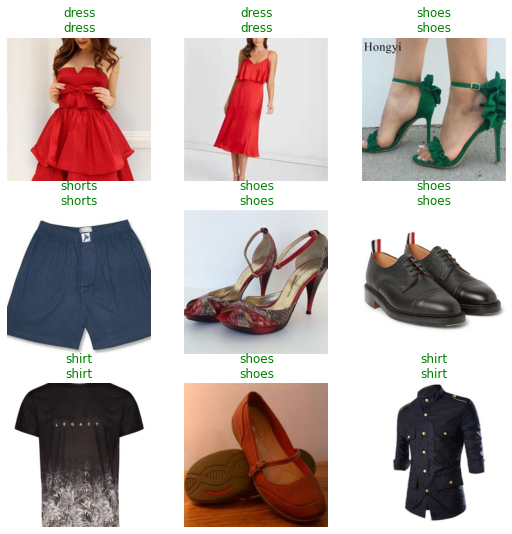

In [26]:
learn.show_results()

## Training for Apparel Colour
* MODEL : ResNet-34
* Loss Function : Flattened Cross Entropy Loss
* Optimizer : ADAM
* Scheduler : One Cycle Policy

In [27]:
learn_col = cnn_learner(dlsc, resnet34, metrics=accuracy)

In [28]:
learn_col.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.606187,0.181674,0.940711,01:32


epoch,train_loss,valid_loss,accuracy,time
0,0.176969,0.132416,0.967501,01:35
1,0.106163,0.104304,0.975406,01:36
2,0.063832,0.098073,0.980237,01:37
3,0.033866,0.067021,0.985068,01:35
4,0.018838,0.062843,0.985946,01:37


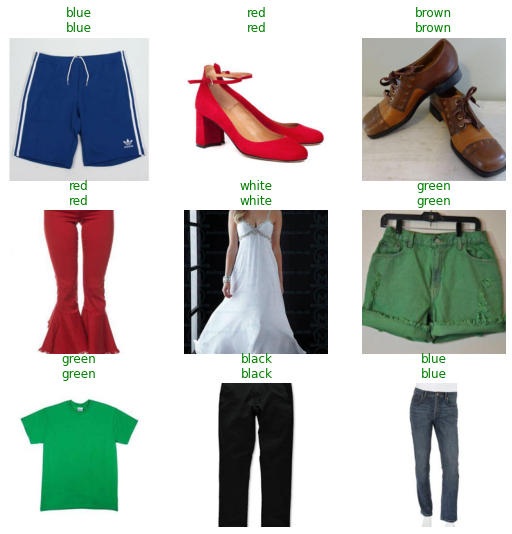

In [29]:
learn_col.show_results()

# **Image Scraping from Flipkart Clothing Section**

## Downloading selenium and Chromedriver for scrapping


In [40]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

## Scrapping one page of Flipkart Fashion

In [42]:
url="https://www.flipkart.com/search?q=summer%20wear&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
wd.get(url)
soup = BeautifulSoup(wd.page_source, 'html.parser')
img_tags = soup.find_all('img')
lists=[]
images = soup.find_all('img', {'src':re.compile('.jpeg')})
for image in images: 
    print(image['src']+'\n')
    lists.append(image['src'])


https://rukminim1.flixcart.com/image/309/371/kbjox3k0/t-shirt/p/u/8/xl-kart3-04-the-fashionplus-original-imafsvq6ghgnzgu3.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/kbb49zk0/t-shirt/e/z/4/s-fbt-04-farbot-original-imafszk37mpwk7am.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/top/t/c/j/pop269-popnetic-xl-original-imaegy6fnea9u7ta.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/k69ncsw0/top/n/v/b/m-96tk2397-selvia-original-imafzrqfydfgztdw.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/kflftzk0/top/q/9/4/xl-50tk1091a-selvia-original-imafwysfy5cygzpg.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/k69ncsw0/top/7/h/x/l-96tk2391-selvia-original-imafzrqerzyv7yhn.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/kflftzk0/top/x/w/h/m-61tk2081-selvia-original-imafwyshpvfexjhj.jpeg?q=50
https://rukminim1.flixcart.com/image/309/371/kbdz5ow0/t-shirt/2/e/j/xl-kart2-06-farbot-original-imafsqxcfpzmztyf.jpeg?q=50
https://rukminim1.flixcart.com/image/309/

In [45]:
print("Number of images per page :", len(lists))

Number of images per page : 40


## Class and Colour Prediction of Flipkart Images

In [47]:
print("")from skimage import io
types=[]
colour=[]
for i in lists:
    image = io.imread(i)
    im=PILImage.create(image)
    types.append(learn.predict(im)[0])
    colour.append(learn_col.predict(im)[0])

In [48]:
x=[]
for i in lists:
    x.append(i)

## Database of Predictions

In [49]:
import pandas as pd
df = pd.DataFrame(zip(x,types,colour), columns =['Image URL', 'Apparel Type','Colour']) 
df.head()


,Image URL,Apparel Type,Colour
0,https://rukminim1.flixcart.com/image/309/371/kbjox3k0/t-shirt/p/u/8/xl-kart3-04-the-fashionplus-original-imafsvq6ghgnzgu3.jpeg?q=50,shirt,black
1,https://rukminim1.flixcart.com/image/309/371/kbb49zk0/t-shirt/e/z/4/s-fbt-04-farbot-original-imafszk37mpwk7am.jpeg?q=50,shirt,red
2,https://rukminim1.flixcart.com/image/309/371/top/t/c/j/pop269-popnetic-xl-original-imaegy6fnea9u7ta.jpeg?q=50,dress,red
3,https://rukminim1.flixcart.com/image/309/371/k69ncsw0/top/n/v/b/m-96tk2397-selvia-original-imafzrqfydfgztdw.jpeg?q=50,dress,white
4,https://rukminim1.flixcart.com/image/309/371/kflftzk0/top/q/9/4/xl-50tk1091a-selvia-original-imafwysfy5cygzpg.jpeg?q=50,dress,blue


In [50]:
df.to_csv("Result.csv")